In [9]:
import keypress_recognition.models as models
from keypress_recognition import dataset_p as dataset
import numpy as np
import matplotlib.pyplot as plt
import cv2
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
concat = False
delta = 3 if concat else 1
channels = 3 * delta

In [11]:
wmodel = models.get_white_bundle_model(channels)

In [12]:
dataset.load_all_data(color=['white'], size=['bundle'], keypress=True, concatenate=concat, delta=delta)

Start seperating keyboard ...
  White single width: 21px
  Black single width: 20px
  White bundle width: 37px
  Black bundle width: 36px


IntProgress(value=0, max=14273)

In trainset: 
  # of pressed white key: 19083
  # of unpressed white key: 57603


IntProgress(value=0, max=5000)

In testset: 
  # of pressed white key: 10831
  # of unpressed white key: 23075


IntProgress(value=0, max=2993)

In valset: 
  # of pressed white key: 5090
  # of unpressed white key: 12324


In [13]:
def visualize_keys(note):
    """
    note: bool
    return: str
    """
    return ("Y" if note else "N")

def display_concat_img(img, idx=None):
    if concat:
        if idx is None:
            return img[:, :, :, 3:6]
        else:
            return img[idx, :, :, 3:6]
    if idx is None:
        return img
    else:
        return img[idx, :, :, :]


Samples from X_train: 


IntProgress(value=0, max=115206)

(2, 106, 37, 3)
1 0
Samples from X_test: 


IntProgress(value=0, max=46150)

(2, 106, 37, 3)
1 0
Samples from X_val: 


IntProgress(value=0, max=24648)

(2, 106, 37, 3)
1 0


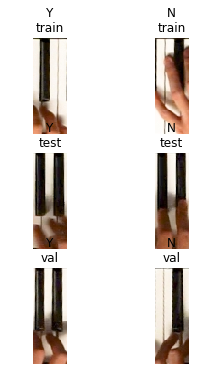

In [14]:
# print several images with labels
fig, axarr = plt.subplots(3, 2, figsize=[4, 6])
for ii, _type in enumerate(['train', 'test', 'val']):

    print(f'Samples from X_{_type}: ')

    for imgb, noteb in dataset.data_batch(type=_type, size='bundle', color='white', batch_size=2, NCHW=False, need_velocity=False, concatenate=concat):
        print(imgb.shape)
        print(noteb[0], noteb[1])
        axarr[ii,0].imshow(cv2.cvtColor(display_concat_img(imgb, 0), cv2.COLOR_BGR2RGB))
        axarr[ii,0].set_title(visualize_keys(noteb[0]) + '\n' + _type)
        axarr[ii,0].axis('off')
        axarr[ii,1].imshow(cv2.cvtColor(display_concat_img(imgb, 1), cv2.COLOR_BGR2RGB))
        axarr[ii,1].set_title(visualize_keys(noteb[1]) + '\n' + _type)
        axarr[ii,1].axis('off')
        break

plt.show()

In [15]:
wmodel.train(dataset, batch_size=32, size='bundle', color='white',
             concatenate=concat,
             num_epochs=20,
             max_num=-1,
             learning_rate=5e-4,
             weight_decay=0.05,
             decay_every=10,
             best_path='keypress_recognition/best_white_bundle_model.tar',
             current_path='keypress_recognition/current_white_bundle.tar',
             method=1)

Epoch 1/20


IntProgress(value=0, max=115206)

train Loss: 0.3523
[[53886  4152]
 [ 3730 53464]]
Precision: 0.93
Recall   : 0.93
Accuracy : 0.93


IntProgress(value=0, max=24648)

val Loss: 0.3221
[[12142  1078]
 [  194 11258]]
Precision: 0.98
Recall   : 0.91
Accuracy : 0.95
The best model has been saved to keypress_recognition/best_white_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 2/20


IntProgress(value=0, max=115206)

train Loss: 0.2901
[[54350  3397]
 [ 3266 54219]]
Precision: 0.94
Recall   : 0.94
Accuracy : 0.94


IntProgress(value=0, max=24648)

val Loss: 0.2652
[[12066   848]
 [  270 11488]]
Precision: 0.98
Recall   : 0.93
Accuracy : 0.95
The best model has been saved to keypress_recognition/best_white_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 3/20


IntProgress(value=0, max=115206)

train Loss: 0.2827
[[54635  3229]
 [ 2981 54387]]
Precision: 0.95
Recall   : 0.94
Accuracy : 0.95


IntProgress(value=0, max=24648)

val Loss: 0.2753
[[11852   552]
 [  484 11784]]
Precision: 0.96
Recall   : 0.96
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 4/20


IntProgress(value=0, max=115206)

train Loss: 0.2812
[[54871  3287]
 [ 2745 54329]]
Precision: 0.95
Recall   : 0.94
Accuracy : 0.95


IntProgress(value=0, max=24648)

val Loss: 0.4026
[[10375    24]
 [ 1961 12312]]
Precision: 0.86
Recall   : 1.00
Accuracy : 0.92
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 5/20


IntProgress(value=0, max=115206)

train Loss: 0.2746
[[55124  3167]
 [ 2492 54449]]
Precision: 0.96
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=24648)

val Loss: 0.2698
[[11705   431]
 [  631 11905]]
Precision: 0.95
Recall   : 0.97
Accuracy : 0.96
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 6/20


IntProgress(value=0, max=115206)

train Loss: 0.2745
[[55031  3200]
 [ 2585 54416]]
Precision: 0.95
Recall   : 0.94
Accuracy : 0.95


IntProgress(value=0, max=24648)

val Loss: 0.2894
[[12003   995]
 [  333 11341]]
Precision: 0.97
Recall   : 0.92
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 7/20


IntProgress(value=0, max=115206)

train Loss: 0.2730
[[54706  3147]
 [ 2910 54469]]
Precision: 0.95
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=24648)

val Loss: 0.2289
[[11951   479]
 [  385 11857]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.96
The best model has been saved to keypress_recognition/best_white_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 8/20


IntProgress(value=0, max=115206)

train Loss: 0.2726
[[54950  3265]
 [ 2666 54351]]
Precision: 0.95
Recall   : 0.94
Accuracy : 0.95


IntProgress(value=0, max=24648)

val Loss: 0.2595
[[11474   334]
 [  862 12002]]
Precision: 0.93
Recall   : 0.97
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 9/20


IntProgress(value=0, max=115206)

train Loss: 0.2672
[[54979  3167]
 [ 2637 54449]]
Precision: 0.95
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=24648)

val Loss: 0.4164
[[11954  1559]
 [  382 10777]]
Precision: 0.97
Recall   : 0.87
Accuracy : 0.92
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 10/20


IntProgress(value=0, max=115206)

train Loss: 0.2676
[[54878  3103]
 [ 2738 54513]]
Precision: 0.95
Recall   : 0.95
Accuracy : 0.95


IntProgress(value=0, max=24648)

val Loss: 0.3024
[[11462   285]
 [  874 12051]]
Precision: 0.93
Recall   : 0.98
Accuracy : 0.95
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 11/20


IntProgress(value=0, max=115206)

train Loss: 0.2118
[[55937  2330]
 [ 1679 55286]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=24648)

val Loss: 0.2004
[[12002   331]
 [  334 12005]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97
The best model has been saved to keypress_recognition/best_white_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 12/20


IntProgress(value=0, max=115206)

train Loss: 0.1954
[[56078  2083]
 [ 1538 55533]]
Precision: 0.97
Recall   : 0.96
Accuracy : 0.97


IntProgress(value=0, max=24648)

val Loss: 0.1917
[[11957   241]
 [  379 12095]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.97
The best model has been saved to keypress_recognition/best_white_bundle_model.tar ...
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 13/20


IntProgress(value=0, max=115206)

train Loss: 0.1884
[[56100  1964]
 [ 1516 55652]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=24648)

val Loss: 0.2091
[[11956   340]
 [  380 11996]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 14/20


IntProgress(value=0, max=115206)

train Loss: 0.1838
[[56164  1900]
 [ 1452 55716]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=24648)

val Loss: 0.2154
[[11891   339]
 [  445 11997]]
Precision: 0.96
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 15/20


IntProgress(value=0, max=115206)

train Loss: 0.1803
[[56153  1831]
 [ 1463 55785]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=24648)

val Loss: 0.2008
[[11929   299]
 [  407 12037]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 16/20


IntProgress(value=0, max=115206)

train Loss: 0.1767
[[56195  1781]
 [ 1421 55835]]
Precision: 0.98
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=24648)

val Loss: 0.1979
[[11979   388]
 [  357 11948]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 17/20


IntProgress(value=0, max=115206)

train Loss: 0.1737
[[56208  1722]
 [ 1408 55894]]
Precision: 0.98
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=24648)

val Loss: 0.2042
[[11859   244]
 [  477 12092]]
Precision: 0.96
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 18/20


IntProgress(value=0, max=115206)

train Loss: 0.1707
[[56223  1693]
 [ 1393 55923]]
Precision: 0.98
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=24648)

val Loss: 0.2079
[[11907   379]
 [  429 11957]]
Precision: 0.97
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 19/20


IntProgress(value=0, max=115206)

train Loss: 0.1688
[[56224  1656]
 [ 1392 55960]]
Precision: 0.98
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=24648)

val Loss: 0.1994
[[11931   303]
 [  405 12033]]
Precision: 0.97
Recall   : 0.98
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Epoch 20/20


IntProgress(value=0, max=115206)

train Loss: 0.1667
[[56235  1587]
 [ 1381 56029]]
Precision: 0.98
Recall   : 0.97
Accuracy : 0.97


IntProgress(value=0, max=24648)

val Loss: 0.2088
[[11888   331]
 [  448 12005]]
Precision: 0.96
Recall   : 0.97
Accuracy : 0.97
Current mode has been saved to keypress_recognition/current_white_bundle.tar ...

Training complete in 42m 32s
Best val loss: 0.191743


IntProgress(value=0, max=46150)

(12, 106, 37, 3)
tensor([1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], dtype=torch.uint8)


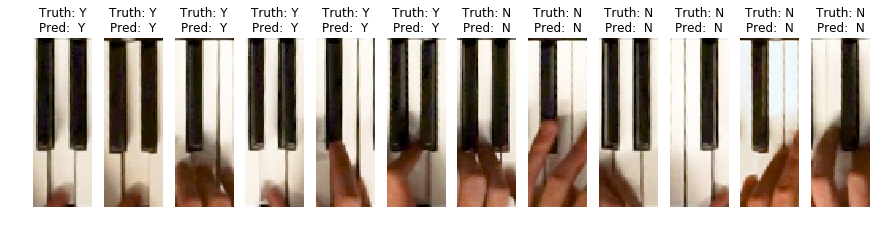

In [18]:
example_batch = 12
fig, axarr = plt.subplots(1, example_batch, figsize=(15,4))
for imgb, noteb in dataset.data_batch(type='test', size='bundle', color='white', batch_size=example_batch, NCHW=True, need_velocity=False, concatenate=concat):
    yb = wmodel.evaluate(imgb, threshold=0.5)
    imgb = np.transpose(imgb, (0, 2, 3, 1))
    print(imgb.shape)
    print(yb)
    for i in range(example_batch):
        axarr[i].imshow(cv2.cvtColor(display_concat_img(imgb, i), cv2.COLOR_BGR2RGB))
        axarr[i].set_title('Truth: ' + visualize_keys(noteb[i]) + '\nPred:  ' + visualize_keys(yb[i]))
        axarr[i].axis('off')
    break
plt.show()